# Scikit-learn tutorial

https://www.youtube.com/watch?v=0B5eIE_1vpU 

## 1.Scikit-learn

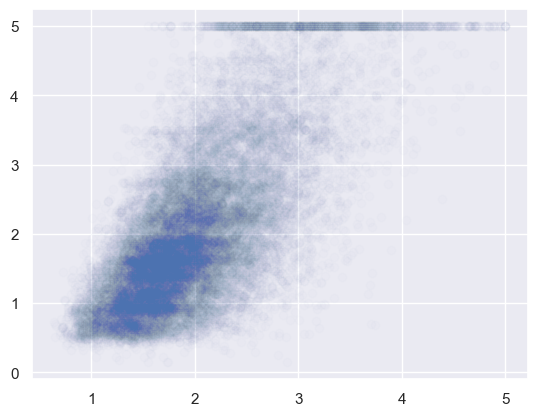

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

X, y = fetch_california_housing(return_X_y=True)
model = KNeighborsRegressor()
model.fit(X, y)
pred = model.predict(X)

plt.scatter(pred, y, alpha = 0.01)
plt.show()

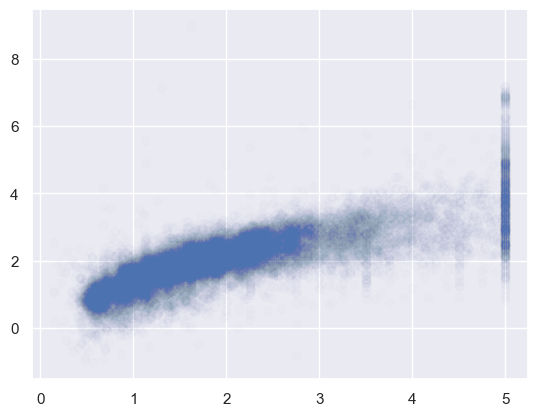

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

plt.scatter(y, pred, alpha = 0.01)
plt.show()

In [27]:
import seaborn as sns 

df = sns.load_dataset('penguins')

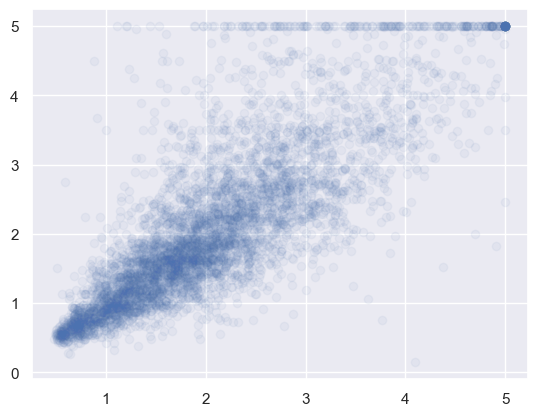

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

sns.set()
plt.scatter(pred, y_test, alpha = 0.05)
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

cv = GridSearchCV(
    estimator = model, 
    param_grid = {
        'kneighborsregressor__n_neighbors': range(1, 11)
    }, 
    cv = 3
)

cv.fit(X_train, y_train)
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005923,0.000546,0.168515,0.015854,1,{'kneighborsregressor__n_neighbors': 1},0.497854,0.517709,0.546954,0.520839,0.020167,10
1,0.006723,0.001017,0.213842,0.037332,2,{'kneighborsregressor__n_neighbors': 2},0.610751,0.617859,0.647062,0.625224,0.015712,9
2,0.006399,0.000622,0.214624,0.015789,3,{'kneighborsregressor__n_neighbors': 3},0.643663,0.655735,0.683423,0.660940,0.016644,8
3,0.006594,0.001239,0.241276,0.008418,4,{'kneighborsregressor__n_neighbors': 4},0.660034,0.671900,0.695482,0.675805,0.014733,7
4,0.006309,0.000769,0.239201,0.017750,5,{'kneighborsregressor__n_neighbors': 5},0.671562,0.676018,0.702825,0.683469,0.013807,6
5,0.006250,0.000373,0.247930,0.018122,6,{'kneighborsregressor__n_neighbors': 6},0.674548,0.681435,0.706635,0.687539,0.013792,5
6,0.005830,0.000216,0.258878,0.020835,7,{'kneighborsregressor__n_neighbors': 7},0.675661,0.684590,0.708422,0.689558,0.013828,4
7,0.006181,0.000356,0.267627,0.018130,8,{'kneighborsregressor__n_neighbors': 8},0.676777,0.688477,0.706402,0.690552,0.012183,3
8,0.006200,0.000382,0.276740,0.016405,9,{'kneighborsregressor__n_neighbors': 9},0.677621,0.688178,0.706982,0.690927,0.012143,2
9,0.006093,0.000105,0.280663,0.021168,10,{'kneighborsregressor__n_neighbors': 10},0.682787,0.688447,0.706537,0.692591,0.010129,1


In [30]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## 2. Preprocessing

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
sns.set()

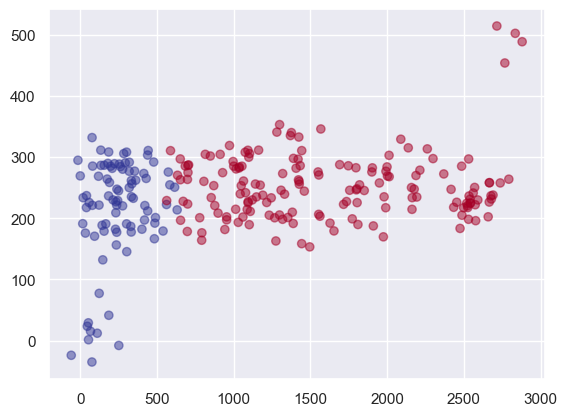

In [32]:
# load dataset
df = pd.read_csv('data/preprocessing/drawndata1.csv')
X = df[['x', 'y']]
y = df['z'] == 'a'

# plot
plt.scatter(
    X['x'], X['y'], 
    c = y, 
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

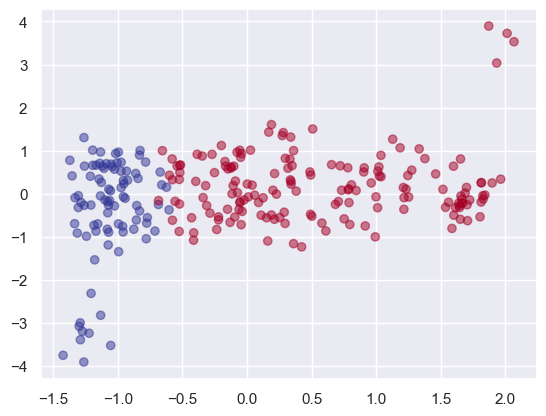

In [33]:
# standardise
X_new = StandardScaler().fit_transform(X)
plt.scatter(
    X_new[:, 0], X_new[:, 1],
    c = y,
    cmap = 'RdYlBu', 
    alpha = 0.5
)

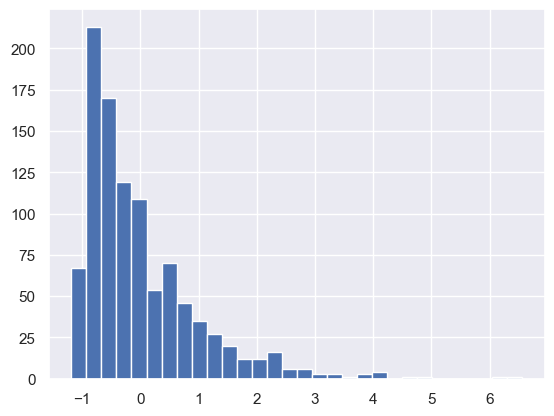

In [34]:
# generate data
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))

plt.hist((x - np.mean(x)) / np.std(x), 30)
plt.show()

/Users/yoichiojima/Desktop/personal/personal-project/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


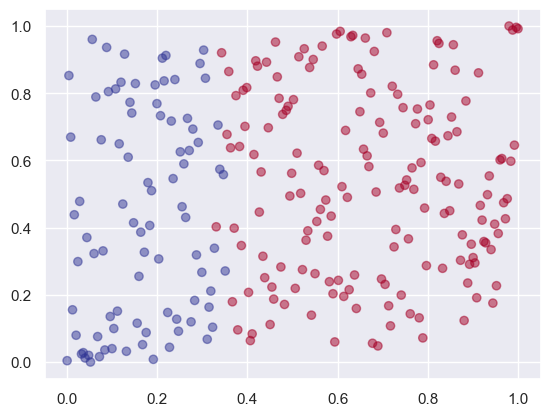

In [35]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer().fit_transform(X)
plt.scatter(
    X_new[:, 0], X_new[:, 1],
    c = y,
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

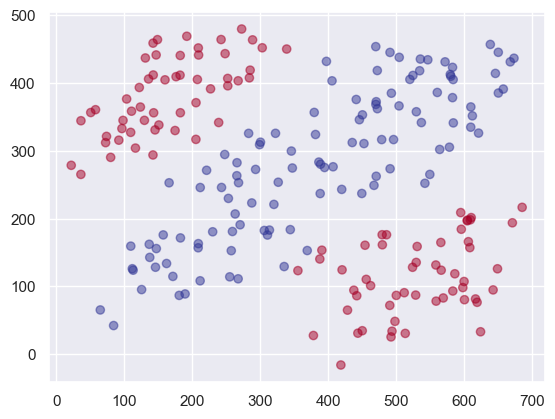

In [36]:
df = pd.read_csv('data/preprocessing/drawndata2.csv')
X = df[['x', 'y']]
y = df['z'] == 'a'
plt.scatter(
    X['x'], X['y'],
    c = y,
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

/Users/yoichiojima/Desktop/personal/personal-project/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (217). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


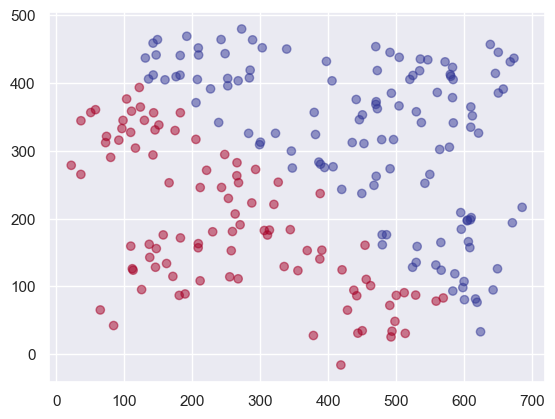

In [37]:
pipe = make_pipeline(
    QuantileTransformer(),
    LogisticRegression()
)

pred = pipe.fit(X, y)
plt.scatter(
    X['x'], X['y'],
    c = pred.predict(X),
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

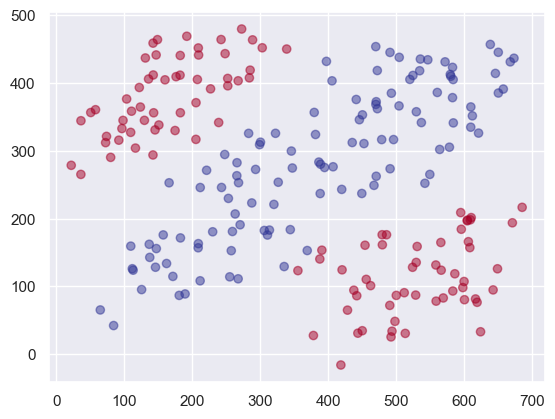

In [38]:
pipe = make_pipeline(
    PolynomialFeatures(),
    LogisticRegression()
)

pred = pipe.fit(X, y)
plt.scatter(
    X['x'], X['y'],
    c = pred.predict(X),
    cmap = 'RdYlBu',
    alpha = 0.5
)
plt.show()

In [39]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [40]:
arr = np.array(['low', 'low', 'high', 'medium']).reshape(-1, 1)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [41]:
enc.transform([['zero']])

array([[0., 0., 0.]])

## 3.Metrics

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [43]:
# load data
df = pd.read_csv('data/metrics/creditcard.csv')[: 80_000]
X = df.drop(columns = ['Time', 'Amount', 'Class'])
y = df['Class']

print(f"fraud: {y.sum()}\nnot fraud: {len(y) - y.sum()}")

fraud: 196
not fraud: 79804


In [44]:
res_0 = LogisticRegression(
    max_iter = 1000
).fit(X, y).predict(X).sum()

res_1 = LogisticRegression(
    class_weight = {0: 1, 1: 2}, # balance the classes
    max_iter = 1000
).fit(X, y).predict(X).sum()

# check how much the param weight can affect the result
print(f"res0: {res_0} res1: {res_1}")

res0: 151 res1: 171


In [45]:
# search the best class weight
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter = 1000), 
    param_grid = {
        # try 1 to 3
        'class_weight': [{0: 1, 1: v} for v in range(1, 4)]
    }, 
    cv = 4, 
    n_jobs = 1
)
pd.DataFrame(grid.fit(X, y).cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.479934,0.122586,0.003000,0.000268,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,0.586588,0.135429,0.003178,0.000190,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,0.561286,0.108506,0.003313,0.000099,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3
